In [1]:
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.preprocessing import Normalizer
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# np.hstack?

In [3]:
n_samples = 1000
n_features = 2
train_rate = 0.8

In [4]:
X, y = make_classification(n_samples=n_samples, n_features=n_features, n_informative=2, n_redundant=0, n_clusters_per_class=1)

In [5]:
X.shape

(1000, 2)

In [6]:
y.shape

(1000,)

In [7]:
N = X.shape[0]

In [8]:
d = X.shape[1]

In [9]:
w = np.ones((d+1, 1))

In [10]:
X = np.array(X)
print(X.shape)

(1000, 2)


In [11]:
y = np.array(y)
y = y.reshape((-1,1))
print(y.shape)

(1000, 1)


In [12]:
np.ones((N, 1)).shape

(1000, 1)

In [13]:
X = np.hstack((np.ones((N, 1)), X))

In [14]:
def logistic_regression(X, w):
    return 1.0/(1+np.exp(-np.dot(X, w)))

In [15]:
y_pred = logistic_regression(X, w)
print(y_pred.shape)

(1000, 1)


In [16]:
def logistic_regression_gradient(X, y, w, N):
    y_pred = logistic_regression(X, w)
    error = y_pred-y
    gradient = 1.0/N * np.dot(np.transpose(X), error)
    return gradient

In [17]:
gradient = logistic_regression_gradient(X, y, w, N)
print(gradient.shape)

(3, 1)


In [18]:
lr = 0.01
errors = []

In [19]:
for epoch in range(10000):
    y_pred = logistic_regression(X, w)
    error = y_pred-y
    errors.append(sum(error))
    gradient = logistic_regression_gradient(X, y, w, N)
    w -= lr*gradient
print(sum(error))

[ 7.94762044]


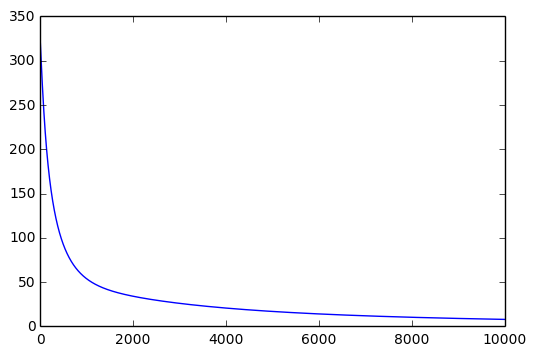

In [20]:
plt.plot(errors)